# Prediciting heart disease using machine learning model

 this machine learning looks into using various machine learning models and data sciene libraries in an attempt to built a machine learning model
 
 we are going to take the following approach
 1. problem defination
 2. data
 3. evaluation
 4. featuring
 5. modelling
 6. experimentation

In [ ]:
##  1) Problem defination
In a statement,
> given clinical parameters about a patient can we predict whether or not they have heart disease?


##  2) Data
The orginal data came from from Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

##  3)Evaluation
> Aiming to reach prediction accuracy above 90% and 80% in worst case scenerio.

##  4)Features of the data
1. (age)
2. (sex)
3. (cp)
4. (trestbps)
5. (chol)
6. (fbs)
7. (restecg)
8. (thalach)
9. (exang)
10. (oldpeak)
11. (slope)
12. (ca)
13. (thal)
14. (num) (this is prediction column of our data) 

Above are 14 features which will be used for the prediction but in original data there were 76 attributes . Not mentioning them 
but will be available at above mentioned former site.

For detail understand of any feature I should visit the mentioned site 

In [1]:
## Predicting the tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

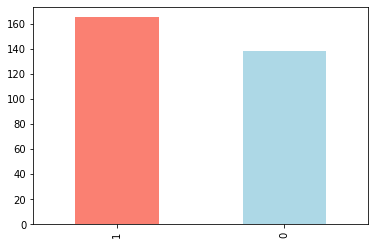

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# there are only two genders Male(1) and female(0)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


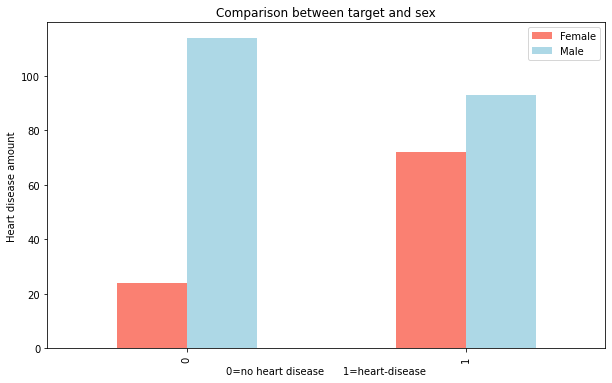

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Comparison between target and sex")
plt.ylabel("Heart disease amount")
plt.xlabel("0=no heart disease      1=heart-disease")
plt.legend(["Female","Male"]);

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# age vs thalach (maximum heart rate)

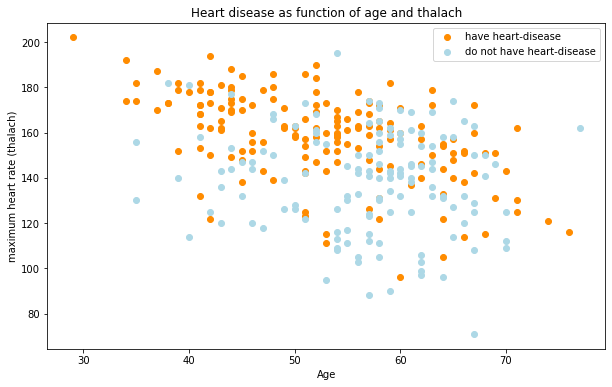

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df["target"]==1],
           df.thalach[df["target"]==1],
           c="darkorange")
plt.title("Heart disease as function of age and thalach")
plt.xlabel("Age")
plt.ylabel("maximum heart rate (thalach)")

plt.scatter(df.age[df["target"]==0],
           df.thalach[df["target"]==0],
           c="lightblue")
plt.legend(["have heart-disease","do not have heart-disease"]);

<AxesSubplot:ylabel='Frequency'>

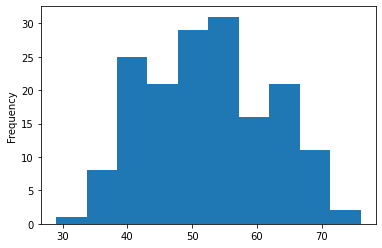

In [16]:
df.age[df["target"]==1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

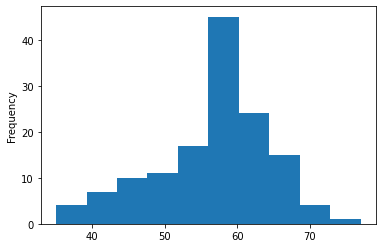

In [17]:
df.age[df["target"]==0].plot.hist()

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Heart Disease frequency per chest Pain
3.cp -chest pain type

 0 Typical agina:chest pain related to decrease blood supply to the heart
        
 1 Atypical agina:chest pain not related to heart
    
 2 Non aginal pain: typical eshophageal (not related to the heart)
    
 3 Asymtomatic :chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


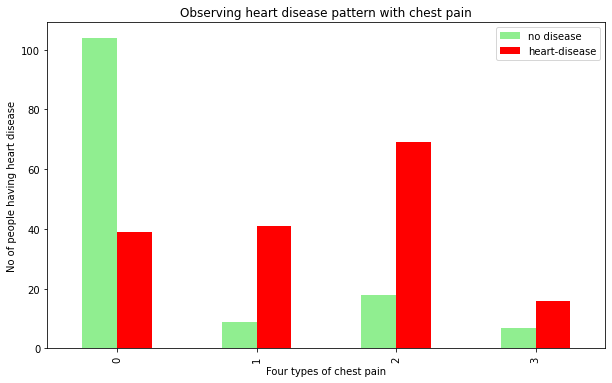

In [20]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["lightgreen","red"])
plt.title('Observing heart disease pattern with chest pain')
plt.xlabel('Four types of chest pain')
plt.ylabel('No of people having heart disease')
plt.legend(["no disease","heart-disease"]);

In [21]:
#making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


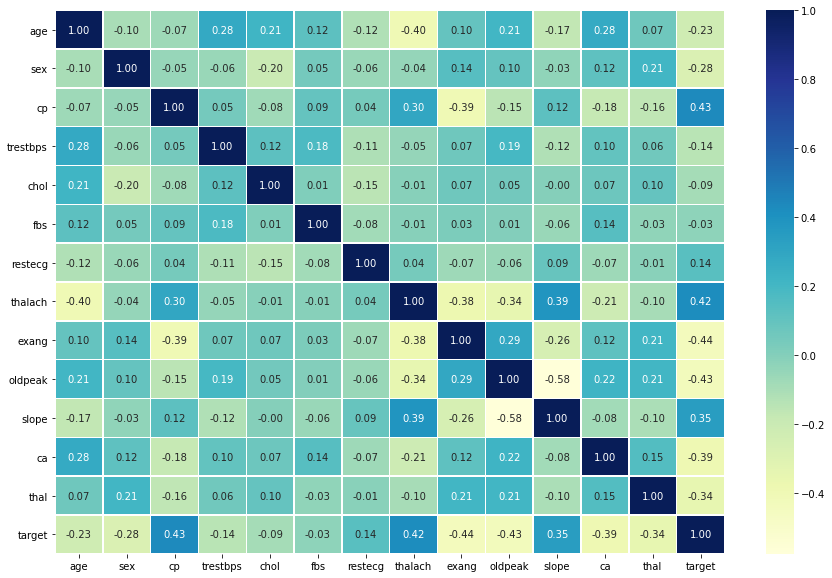

In [22]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

# Modelling 

In [23]:
X=df.drop("target",axis=1)
y=df["target"]

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
#splitting into train and test
np.random.seed(44)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
print("size of x train ", X_train.shape)
print("size of x test", X_test.shape)

size of x train  (242, 13)
size of x test (61, 13)


# Testing suitable model for the predictions

In [28]:
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(44)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [29]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

model_scores

C:\Users\raj shekhar\Anaconda3\envs\need\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

### Model comparison

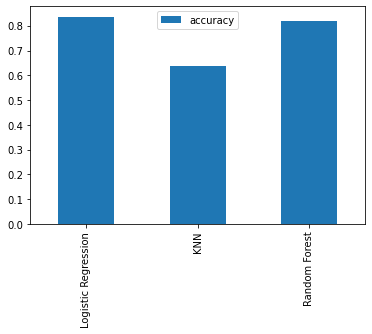

In [30]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

We are getting RandomForestClassifier and Logistic Regression almost 
equally good.
Now I am going try out these steps to refine the model 
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* classification Report
* Roc curve
* Area under the curve (AUC)

## Hyperparmeter tuning

In [31]:
train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [32]:
train_scores

[1.0,
 0.7768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.7479338842975206,
 0.743801652892562,
 0.7107438016528925,
 0.7107438016528925,
 0.6983471074380165,
 0.6900826446280992,
 0.6611570247933884,
 0.6776859504132231,
 0.6942148760330579,
 0.6652892561983471,
 0.6776859504132231,
 0.6859504132231405,
 0.6776859504132231,
 0.6570247933884298,
 0.6776859504132231,
 0.6570247933884298]

In [33]:
test_scores

[0.6721311475409836,
 0.5901639344262295,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853]

maximum KNN score on the test data: 73.77%


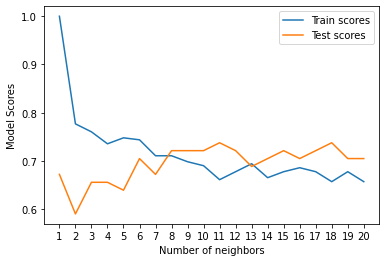

In [34]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning using randomized cv

In [35]:
# create hyper parameter for logistic regression


In [36]:
# tuning logistic regression and 
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
              "max_depth":[None,3,5,10],
              "min_samples_split":np.arange(2,20,2),
              "min_samples_leaf":np.arange(1,20,2)}

Tuning above two models with RandomizedSearchCV


In [37]:
# Tunning logistic Regression
np.random.seed(44)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [39]:
rs_log_reg.score(X_test,y_test)

0.8360655737704918

In [40]:
# tuning randomforest Classifier
np.random.seed(44)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test,y_test)

0.8360655737704918

## Hypertuning using Grid Search CV

 Since our trial by hand tuning and RandomizedSearchCV didn't provided desired level of score we will go for Grid Search cv

In [43]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

# Evaluating our tuned machine learning model classifier
*ROC and AUC curve

*Confusion matrix

*Classification report

*Precision

*Recall

*F1-score

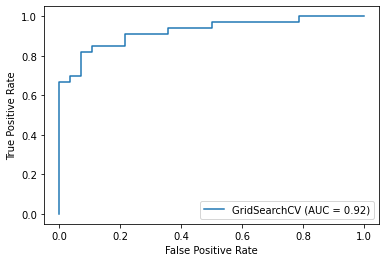

In [45]:
y_predicts=gs_log_reg.predict(X_test)
plot_roc_curve(gs_log_reg,X_test,y_test)

In [46]:
#Confusion matrix
print(confusion_matrix(y_test,y_predicts))

[[23  5]
 [ 5 28]]


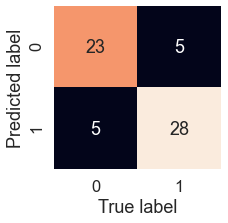

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_predicts):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_predicts),
                 annot=True,
                 cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_predicts)

In [48]:
print(classification_report(y_test,y_predicts))            

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



#### Cross validation scores

In [49]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [50]:
clf=LogisticRegression(C= 4.281332398719396,
                      solver= 'liblinear')

In [51]:
#Cross-Val accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='accuracy')
cv_acc=cv_acc.mean()
cv_acc

0.8215846994535518

In [52]:
#Cross-Val precision
cv_precision=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='precision')
cv_precision=cv_precision.mean()
cv_precision

0.8179096985548598

In [53]:
#Cross-Val recall
cv_recall=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='recall')
cv_recall=cv_recall.mean()
cv_recall

0.8727272727272727

In [54]:
# Cross-Val f1-score
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='f1')
cv_f1=cv_f1.mean()
cv_f1

0.8429665874032072

<AxesSubplot:title={'center':'Cross Validated classification metrics'}>

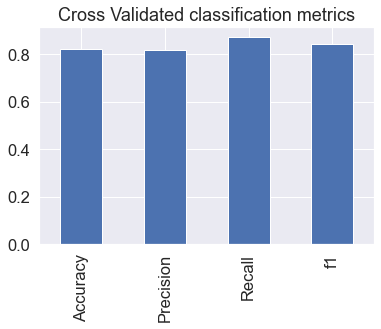

In [55]:
# Visulazing cross validate-metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_precision,
                       "Recall":cv_recall,
                       "f1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross Validated classification metrics",
                    legend=False)


# Finding most important features

In [56]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [57]:
clf=LogisticRegression(C=4.281332398719396,
                      solver='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [58]:
clf.coef_

array([[ 0.00320004, -1.6126372 ,  0.84518039, -0.01777572, -0.00343975,
         0.24182986,  0.56472969,  0.0302157 , -1.05679531, -0.36594129,
         0.79124635, -0.83980882, -1.072054  ]])

In [59]:
#checking out features which barely have any impact on the predictions
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032000425971941684,
 'sex': -1.6126372028381353,
 'cp': 0.845180393968075,
 'trestbps': -0.017775722948747824,
 'chol': -0.0034397547341321858,
 'fbs': 0.24182986089212644,
 'restecg': 0.5647296911786143,
 'thalach': 0.03021569530725308,
 'exang': -1.0567953101919987,
 'oldpeak': -0.3659412920396712,
 'slope': 0.7912463471921556,
 'ca': -0.8398088241862627,
 'thal': -1.0720539999273757}

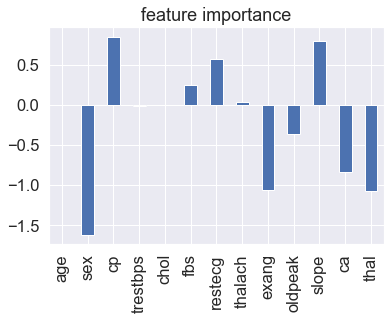

In [60]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False);

What we can conclude from this observation is that we can drop data regarding 
   age,
   trestbps and
   chol    
They are barely making any kind positive of negative import on the predictions.

# Saving the Model
Consider the Logistic regression my mode saving it for export or deploying purpose.

In [62]:
from joblib import dump

dump(clf, 'model.joblib')

['model.joblib']

In [63]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


'C:\Users\raj' is not recognized as an internal or external command,
operable program or batch file.
